In [75]:
import numpy as np
import  pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

# 数据获取

In [77]:
# 读取数据
data = pd.read_csv('./data/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


(array([536., 398., 129.,  86.,  35.,  59.,  57.,  32.,   2.,   4.]),
 array([ 1121.8739  ,  7386.729311, 13651.584722, 19916.440133,
        26181.295544, 32446.150955, 38711.006366, 44975.861777,
        51240.717188, 57505.572599, 63770.42801 ]),
 <BarContainer object of 10 artists>)

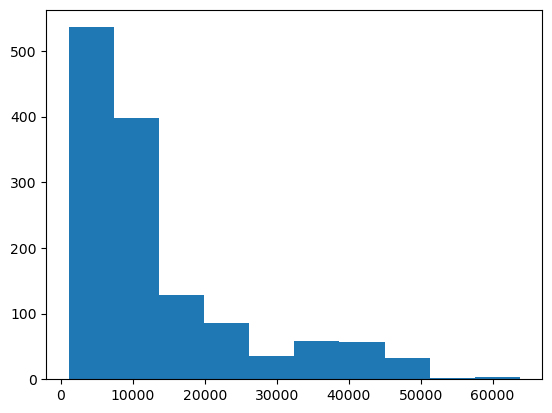

In [7]:
plt.hist(data["charges"])

(array([ 19.,   1.,  26.,  37.,  32.,  36.,  33.,  32.,  36.,  38.,  67.,
         50.,  58.,  71.,  69.,  85.,  87., 111.,  86.,  29.,  41.,  49.,
         40.,  34.,  17.,  44.,  54.,  45.,   7.,   4.]),
 array([ 7.02364666,  7.15829379,  7.29294092,  7.42758805,  7.56223518,
         7.69688231,  7.83152943,  7.96617656,  8.10082369,  8.23547082,
         8.37011795,  8.50476508,  8.63941221,  8.77405934,  8.90870647,
         9.0433536 ,  9.17800073,  9.31264785,  9.44729498,  9.58194211,
         9.71658924,  9.85123637,  9.9858835 , 10.12053063, 10.25517776,
        10.38982489, 10.52447202, 10.65911914, 10.79376627, 10.9284134 ,
        11.06306053]),
 <BarContainer object of 30 artists>)

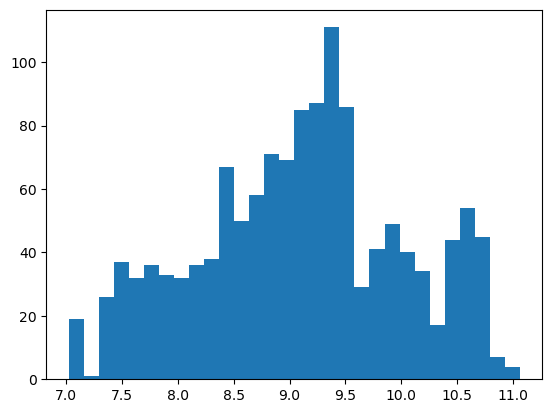

In [10]:
plt.hist(np.log1p(data["charges"]),bins=30)

# EDA 数据探索

## 性别对于花销的影响

<Axes: xlabel='charges', ylabel='Density'>

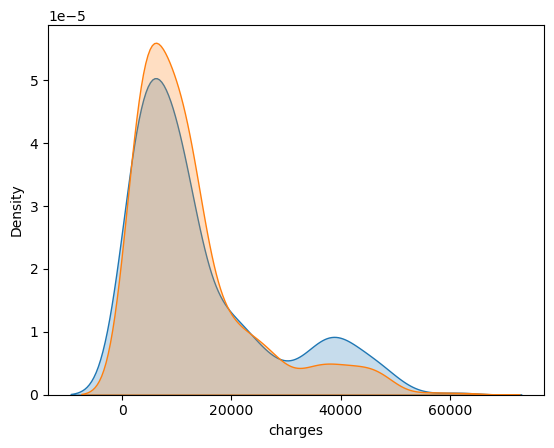

In [40]:
sns.kdeplot(data.loc[data.sex == 'male',"charges"],fill=True,label='male')
sns.kdeplot(data.loc[data.sex == 'female',"charges"],fill=True,label='female')
sns.kdeplot()

## 是否抽烟对于花销的影响

<Axes: xlabel='charges', ylabel='Density'>

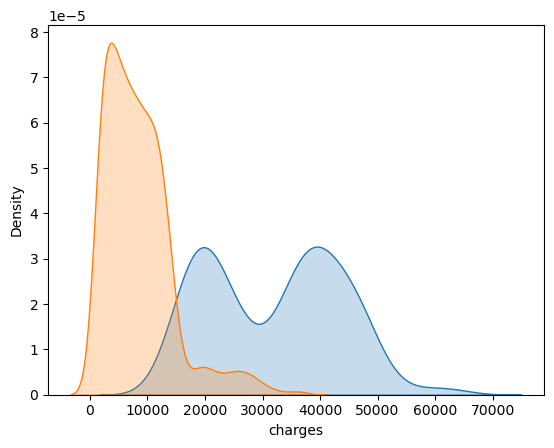

In [46]:
sns.kdeplot(data.loc[data.smoker == 'yes',"charges"],fill=True)
sns.kdeplot(data.loc[data.smoker == 'no',"charges"],fill=True)

## 区域对于花销的影响

<Axes: xlabel='charges', ylabel='Density'>

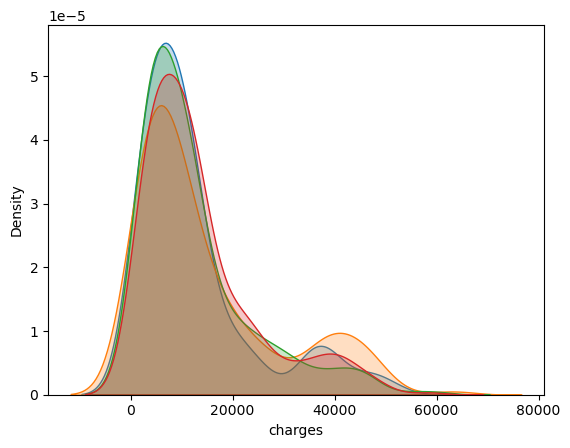

In [22]:
sns.kdeplot(data.loc[data.region == 'southwest',"charges"],fill=True)
sns.kdeplot(data.loc[data.region == 'southeast',"charges"],fill=True)
sns.kdeplot(data.loc[data.region == 'northwest',"charges"],fill=True)
sns.kdeplot(data.loc[data.region == 'northeast',"charges"],fill=True)

## 孩子的数量对于花销的影响

<Axes: xlabel='charges', ylabel='Density'>

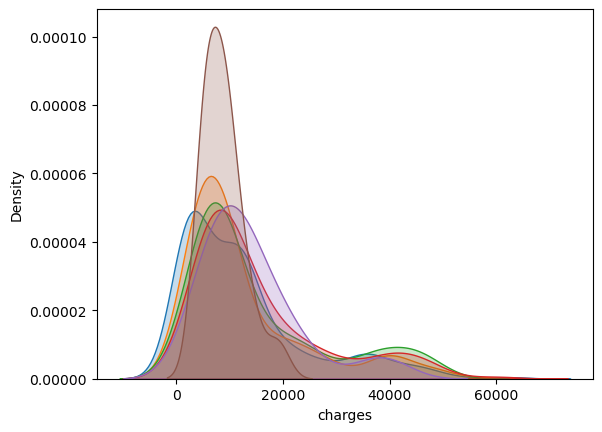

In [26]:
sns.kdeplot(data.loc[data.children == 0,"charges"],fill=True)
sns.kdeplot(data.loc[data.children == 1,"charges"],fill=True)
sns.kdeplot(data.loc[data.children == 2,"charges"],fill=True)
sns.kdeplot(data.loc[data.children == 3,"charges"],fill=True)
sns.kdeplot(data.loc[data.children == 4,"charges"],fill=True)
sns.kdeplot(data.loc[data.children == 5,"charges"],fill=True)

# 特征工程

除对于目标值不要紧的特征，，因为探索数据发现 region、sex 和最后的 charges 花销基本上相关系数很低很低，所以直接特征选择给去除掉，降维可以使得模型训练和使用的时候计算速度更快，同时也更加有效的防止了过拟合

In [78]:
data = data.drop(['region','sex'], axis=1)
data.head()

,age,bmi,children,smoker,charges
0,19,27.900,0,yes,16884.92400
1,18,33.770,1,no,1725.55230
2,28,33.000,3,no,4449.46200
3,33,22.705,0,no,21984.47061
4,32,28.880,0,no,3866.85520


用于将样本中每个 bmi 特征大于等于 30 的变成标签‘over’，小于 30 的变成‘under’，
这样做是建立在知道医学上 bmi 这个肥胖指数 30 是个很关键的阈值，大于等于 30 属于肥
胖，小于 30 不属于肥胖。
另外探索数据发现维度 children 这个指标是 0 的和大于 0 的对最后目标函数影响不同，
说明没孩子和有孩子的在保险这项花销这件事情上观点是不同的，而大于 0 甭管有几个孩
子观点都是差不多的，这可能就是俗话说的有孩子以后人就不一样了吧，所以将没有孩子的
打标签为‘no’，有孩子的打标签为‘yes’。

In [82]:
def greater(df,bmi,num_child):
    df['bmi'] = 'over' if df['bmi'] >= bmi else 'under' 
    df['children'] = 'no' if df['children'] == num_child else 'yes' 
    return df

data = data.apply(greater,axis=1,args=(30,0,))
data.head()

,age,bmi,children,smoker,charges
0,19,under,no,yes,16884.92400
1,18,over,yes,no,1725.55230
2,28,over,yes,no,4449.46200
3,33,under,no,no,21984.47061
4,32,under,no,no,3866.85520


In [83]:
# 需要对非数字化的列进行数字化 One-hot编码 或者是 LabelEncoder
data = pd.get_dummies(data)
data

,age,charges,bmi_over,bmi_under,children_no,children_yes,smoker_no,smoker_yes
0,19,16884.92400,0,1,1,0,0,1
1,18,1725.55230,1,0,0,1,1,0
2,28,4449.46200,1,0,0,1,1,0
3,33,21984.47061,0,1,1,0,1,0
4,32,3866.85520,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...
1333,50,10600.54830,1,0,0,1,1,0
1334,18,2205.98080,1,0,1,0,1,0
1335,18,1629.83350,1,0,1,0,1,0
1336,21,2007.94500,0,1,1,0,1,0


## 基础数据处理

In [84]:
X = data.drop("charges",axis=1)
X.head()

,age,bmi_over,bmi_under,children_no,children_yes,smoker_no,smoker_yes
0,19,0,1,1,0,0,1
1,18,1,0,0,1,1,0
2,28,1,0,0,1,1,0
3,33,0,1,1,0,1,0
4,32,0,1,1,0,1,0


In [85]:
y = data["charges"]
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [86]:
# null的处理
X.fillna(0,inplace=True)
y.fillna(0,inplace=True)

In [87]:
# 训练集和测试集划分
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=11)

In [88]:
X_train.shape,X_test.shape

((1070, 7), (268, 7))

## 标准化

In [89]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## 升维

In [90]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()
X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)
X_train.shape,X_test.shape

((1070, 36), (268, 36))

# 模型训练

## 线性回归

In [98]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train,np.log1p(y_train))
y_predict = reg.predict(X_test)

## Ridge 岭回归

In [92]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.001,max_iter=1000)
ridge.fit(X_train,np.log1p(y_train))
y_predict_ridge = ridge.predict(X_test)

## GradientBoostingRegressor

In [93]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train,np.log1p(y_train))
y_predict_gbr = gbr.predict(X_test)

# 模型评估

## 线性回归

In [100]:
from sklearn.metrics import mean_squared_error
rmse_train = np.sqrt(mean_squared_error(y_true=y_train,y_pred=np.exp(reg.predict(X_train))))
# rmse_test = np.sqrt(mean_squared_error(y_true=y_test,y_pred=np.exp(y_predict)))
log_rmse_train = np.sqrt(mean_squared_error(y_true=np.log1p(y_train),y_pred=reg.predict(X_train)))
log_rmse_test = np.sqrt(mean_squared_error(y_true=np.log1p(y_test),y_pred=y_predict))
rmse_train,log_rmse_train,log_rmse_test

(4811.454466749808, 0.37852787733049353, 2824294969265.8477)

## Riger 岭回归

In [101]:
from sklearn.metrics import mean_squared_error
rmse_train_riger = np.sqrt(mean_squared_error(y_true=y_train,y_pred=np.exp(ridge.predict(X_train))))
rmse_test_riger = np.sqrt(mean_squared_error(y_true=y_test,y_pred=np.exp(y_predict_ridge)))
log_rmse_train_riger = np.sqrt(mean_squared_error(y_true=np.log1p(y_train),y_pred=ridge.predict(X_train)))
log_rmse_test_riger = np.sqrt(mean_squared_error(y_true=np.log1p(y_test),y_pred=y_predict_ridge))
rmse_train_riger,rmse_test_riger,log_rmse_train_riger,log_rmse_test_riger

(4806.123350524992, 4418.42727622768, 0.37810847901629524, 0.39547928690563106)

## GradientBoostingRegressor

In [102]:
from sklearn.metrics import mean_squared_error
rmse_train_gbr = np.sqrt(mean_squared_error(y_true=y_train,y_pred=np.exp(gbr.predict(X_train))))
rmse_test_gbr = np.sqrt(mean_squared_error(y_true=y_test,y_pred=np.exp(y_predict_gbr)))
log_rmse_train_gbr = np.sqrt(mean_squared_error(y_true=np.log1p(y_train),y_pred=gbr.predict(X_train)))
log_rmse_test_gbr = np.sqrt(mean_squared_error(y_true=np.log1p(y_test),y_pred=y_predict_gbr))
rmse_train_gbr,rmse_test_gbr,log_rmse_train_gbr,log_rmse_test_gbr

(4399.869229117662,
 4079.035038982342,
 0.35240133600211804,
 0.39573184116982635)